<a href="https://colab.research.google.com/github/iron59zug/YFapi/blob/master/MACD_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# learn to plot MACD with py

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Saving EURN.2004.csv to EURN.2004 (1).csv


Saving INGA.2001.csv to INGA.2001.csv


In [131]:
from google.colab import files
upE = files.upload()
upI = files.upload()
STs=12
LTs=26
SLs=9
fsx=36
fsy=6
#fsxy="figsize=($fsx,$fsy)"

In [70]:
# data frame
df = pd.read_csv('EURN.2004.csv')

#
###-----------> df['date']=df['time'].dt.date
df = df.set_index(pd.DatetimeIndex(df['time'].values))

df.rename(columns={'EURONAV':'eurn', 'EURONAV( volume )':'vol.'}, inplace=True)

print("\n df test")
df.head(5)
# df.tail(10)
# 0-3976
#df



 df test


,time,eurn,vol.
2004-12-01 01:00:00,2004-12-01 01:00,25.85,349067
2004-12-02 01:00:00,2004-12-02 01:00,24.00,160090
2004-12-03 01:00:00,2004-12-03 01:00,23.60,121344
2004-12-06 01:00:00,2004-12-06 01:00,22.10,97246
2004-12-07 01:00:00,2004-12-07 01:00,20.60,165611


In [58]:
# ct = pd.crosstab(df.xxx, df.yyy, normalize='index')*100
# ct = ct.drop(columns=['vol.'])
#ct = --->df['index'],<--- df['time'], df['€URN']
# datetime = ct['time'].tolist()
#ct

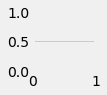

In [121]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(1,1))
#ax1 = sns.lineplot(x=ct['index'].tolist(), y=ct['€URN'].tolist())

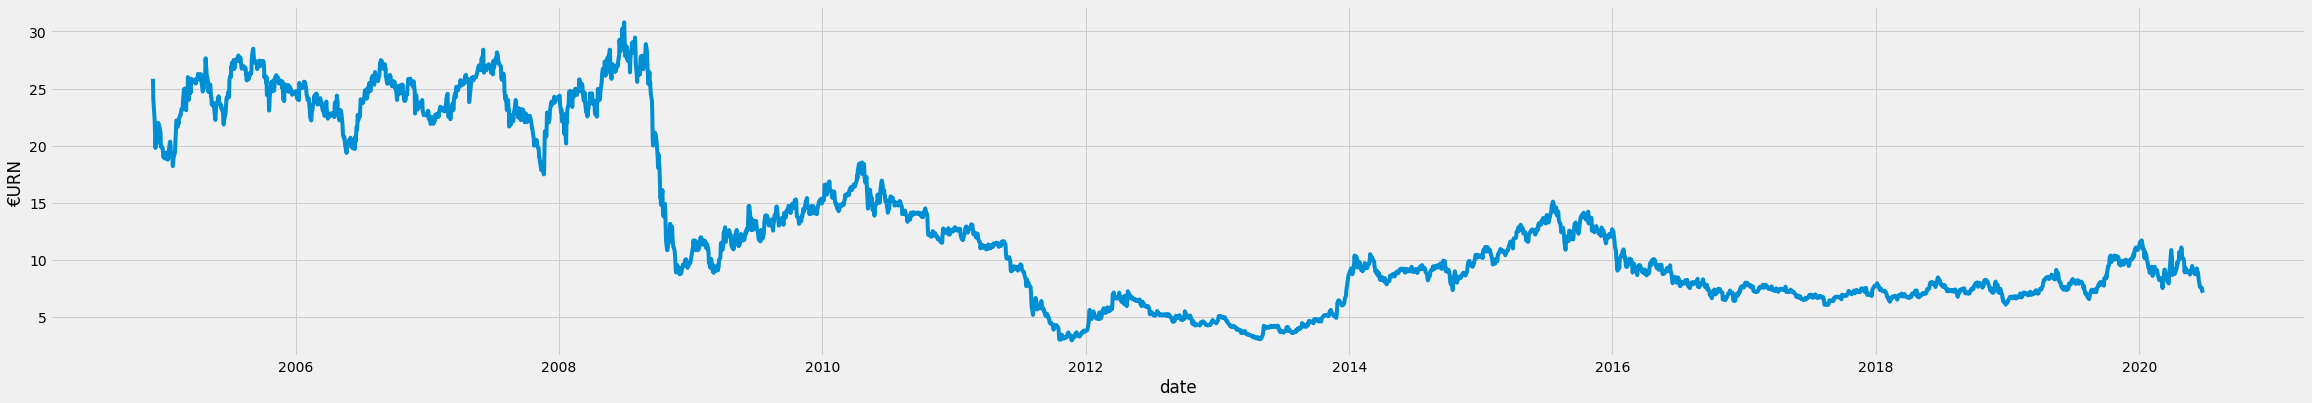

In [122]:
plt.figure(figsize=(fsx, fsy))
plt.plot(df['eurn'])
plt.xlabel('date'); plt.ylabel('€URN')
plt.show()

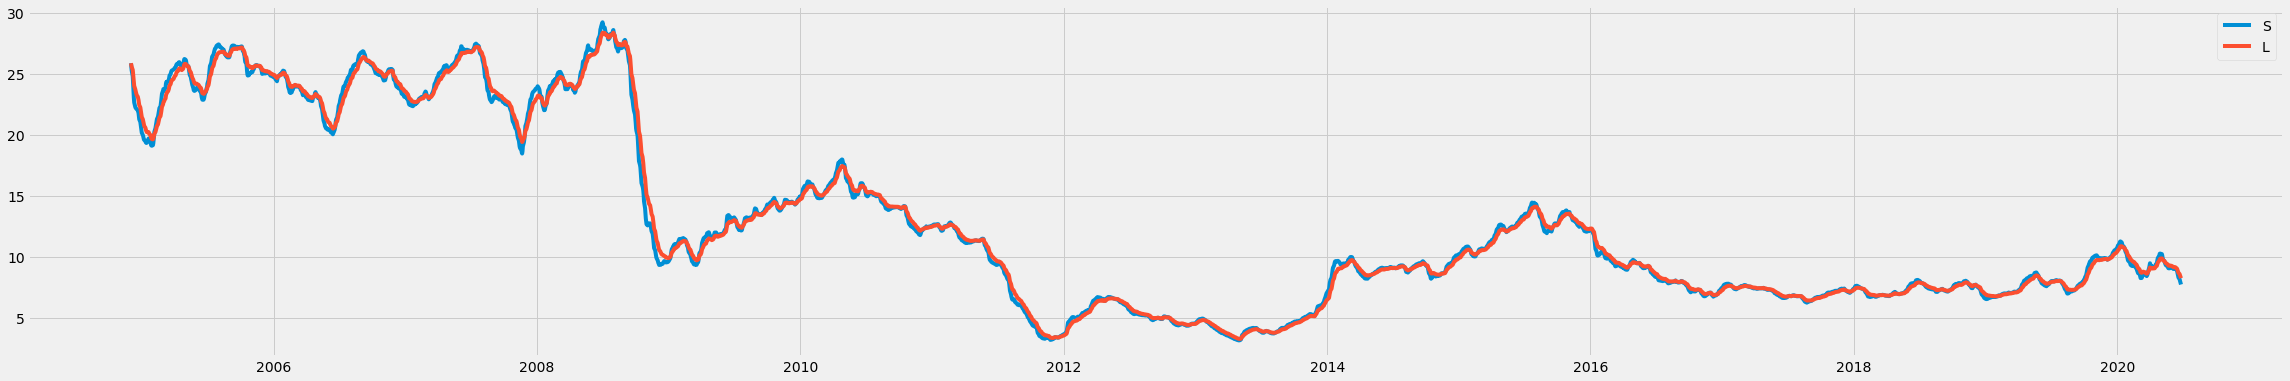

In [132]:
# exponential MA, EMAs
SEMA = df.eurn.ewm(span=STs, adjust=False).mean()
LEMA = df.eurn.ewm(span=LTs, adjust=False).mean()
plt.figure(figsize=(fsx, fsy))
plt.plot(df.index, SEMA, label='S')
plt.plot(df.index, LEMA, label='L')
plt.legend(loc='upper right')
plt.show()

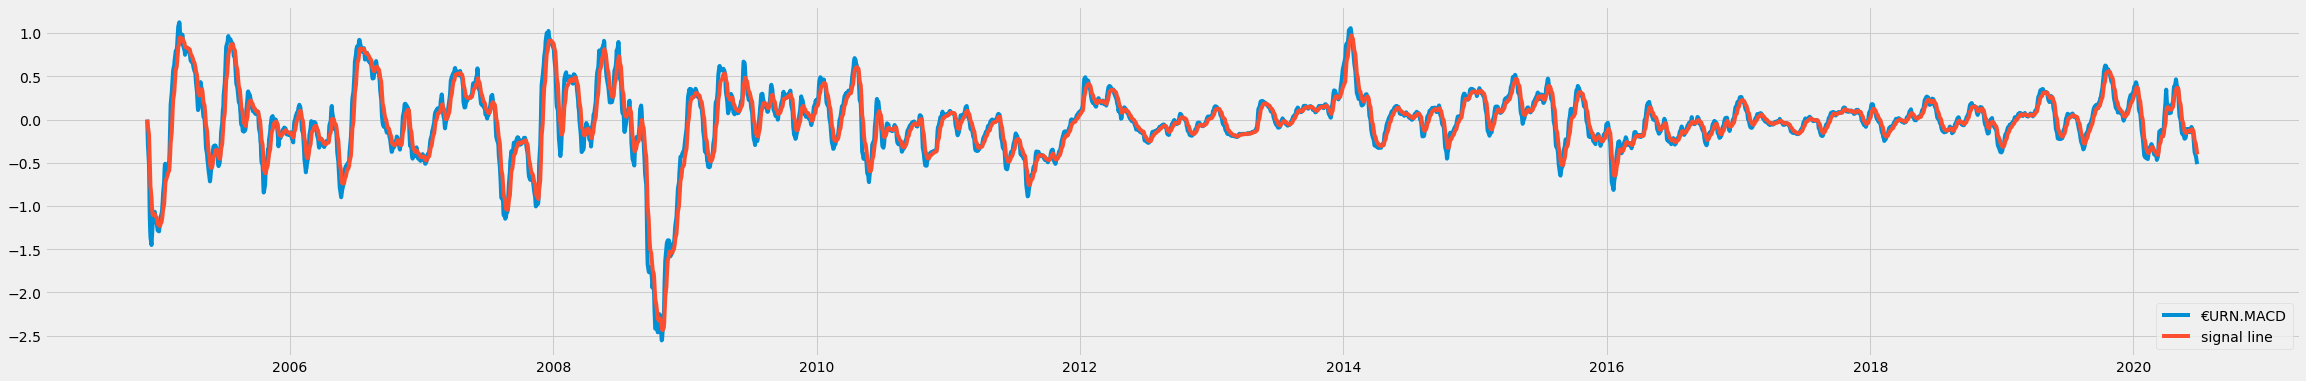

,time,eurn,vol.,MACD,SL,Bprice,Sprice
2004-12-01 01:00:00,2004-12-01 01:00,25.850,349067,0.000000,0.000000,NaN,NaN
2004-12-02 01:00:00,2004-12-02 01:00,24.000,160090,-0.147578,-0.029516,NaN,24.0
2004-12-03 01:00:00,2004-12-03 01:00,23.600,121344,-0.293429,-0.082298,NaN,NaN
2004-12-06 01:00:00,2004-12-06 01:00,22.100,97246,-0.524014,-0.170642,NaN,NaN
2004-12-07 01:00:00,2004-12-07 01:00,20.600,165611,-0.818359,-0.300185,NaN,NaN
...,...,...,...,...,...,...,...
2020-06-22 02:00:00,2020-06-22 02:00,7.480,1130204,-0.418564,-0.279325,NaN,NaN
2020-06-23 02:00:00,2020-06-23 02:00,7.510,1440519,-0.439990,-0.311458,NaN,NaN
2020-06-24 02:00:00,2020-06-24 02:00,7.255,1340558,-0.472105,-0.343587,NaN,NaN
2020-06-25 02:00:00,2020-06-25 02:00,7.210,1256838,-0.495476,-0.373965,NaN,NaN


In [133]:
MACD = SEMA - LEMA
SL = MACD.ewm(span=SLs, adjust=False).mean()
plt.figure(figsize=(fsx,fsy))
plt.plot(df.index, MACD, label='€URN.MACD')
#ax1 = sns.lineplot(x=df.index, y=SL)
plt.plot(df.index, SL, label='signal line')
plt.legend(loc='lower right')
plt.show()
df['MACD']=MACD; df['SL']=SL; df

In [134]:
def bos(line):
  Buy=[]
  Sell=[]
  flag=-1
  for i in range(0, len(SL)):
    if line['MACD'][i] > line['SL'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(line['eurn'][i])
        flag = 1
      else: 
        Buy.append(np.nan)
    elif line['MACD'][i] < line['SL'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(line['eurn'][i])
        flag = 0
      else: 
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return (Buy, Sell)

bosc=bos(df)
df['Bprice'] = bosc[0]
df['Sprice'] = bosc[1]
df


,time,eurn,vol.,MACD,SL,Bprice,Sprice
2004-12-01 01:00:00,2004-12-01 01:00,25.850,349067,0.000000,0.000000,NaN,NaN
2004-12-02 01:00:00,2004-12-02 01:00,24.000,160090,-0.147578,-0.029516,NaN,24.0
2004-12-03 01:00:00,2004-12-03 01:00,23.600,121344,-0.293429,-0.082298,NaN,NaN
2004-12-06 01:00:00,2004-12-06 01:00,22.100,97246,-0.524014,-0.170642,NaN,NaN
2004-12-07 01:00:00,2004-12-07 01:00,20.600,165611,-0.818359,-0.300185,NaN,NaN
...,...,...,...,...,...,...,...
2020-06-22 02:00:00,2020-06-22 02:00,7.480,1130204,-0.418564,-0.279325,NaN,NaN
2020-06-23 02:00:00,2020-06-23 02:00,7.510,1440519,-0.439990,-0.311458,NaN,NaN
2020-06-24 02:00:00,2020-06-24 02:00,7.255,1340558,-0.472105,-0.343587,NaN,NaN
2020-06-25 02:00:00,2020-06-25 02:00,7.210,1256838,-0.495476,-0.373965,NaN,NaN


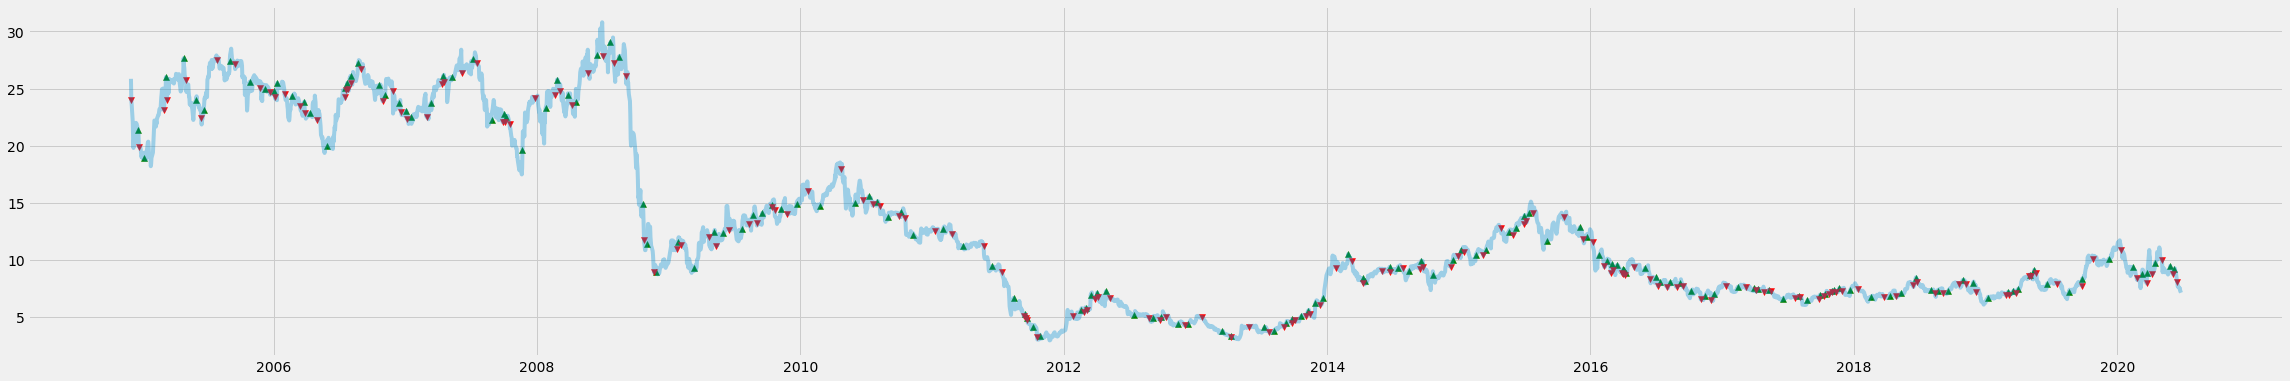

In [135]:
plt.figure(figsize=(fsx, fsy))
plt.scatter(df.index, df['Bprice'], color='green', label='B', marker='^', alpha=1)
plt.scatter(df.index, df['Sprice'], color='red', label='S', marker='v', alpha=1)
plt.plot(df['eurn'], alpha=0.35)

plt.show()